<a href="https://colab.research.google.com/github/HarshithaDas/Mnist_Handwritten_Digits/blob/main/Mnist_Handwritten_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          7212      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1930      
Total params: 9,766
Trainable params: 9,7

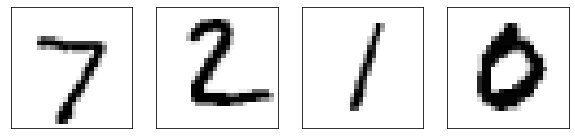

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name()
#####Loading the dataset##### 
from keras.datasets import mnist 
import keras 
import matplotlib.pyplot as plt 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(X_train.shape) 
X1_test=X_test
#####Pre-processing##### 
X_train = X_train.reshape(60000,28,28,1) 
X_test = X_test.reshape(10000,28,28,1) 
y_train = keras.utils.to_categorical(y_train, dtype ="uint8") 
y_test = keras.utils.to_categorical(y_test, dtype ="uint8") 
#print(y_train.shape) 
#print(y_test.shape) 
#####Building the model##### 
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 
model = Sequential() 
model.add(Conv2D(24, kernel_size=5, activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model.add(Conv2D(12, kernel_size=5, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))
model.summary()
 
from keras.utils.vis_utils import plot_model 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
 
 
#####Compiling the model##### 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#####Training the model##### 
model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=3)
#####Making predictions##### 
model.predict(X_test[:4])
y_test[:4]
#####Verification##### 
plt.figure(figsize=(10,10)) 
for i in range(4): 
  plt.subplot(1,4,i+1) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.grid(False) 
  plt.imshow(X1_test[i], cmap=plt.cm.binary) 
 
plt.show()